<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-34/blob/main/Entrega_2_(18_11)_%3E_Clasificaci%C3%B3n_Ensambles_y_Presentaci%C3%B3n_Ejecutiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres : Katherine Vanegas Salamanca / David Andrés González Medina

Matricula : A01794113 / A01794025

Materia: Ciencia de Datos

Profesor: Maria de la Paz Rico / Roberto Antonio Guevara González

Actividad: Actividad Semanal -- 9 Parte 2

# Base de datos: Aguas subterraneas

### Importar datos

In [38]:
# Se importan las librerías requeridas

import pandas as pd
import numpy as np
import matplotlib as mpl
import requests, zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn.preprocessing import label_binarize

In [39]:
# En está sección se llama la Base de Datos a utilizar mediante la variable path. Luego se crea el DataFrame y se imprime las 5 primeras

# path = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-34/blob/main/Proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

path = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

req = requests.get(path)

zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df = pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
y = df['SEMAFORO']

df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


## **Limpieza de Datos**

In [40]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [41]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [42]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [44]:
categoricas = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

df_num = df[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [45]:
for i in numericas:
  print(" nombre de la columna " + i)
  print(" sumatoria por valores uncos") 
  print(df[i].value_counts())


 nombre de la columna ALC_mg/L
 sumatoria por valores uncos
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 nombre de la columna CONDUCT_mS/cm
 sumatoria por valores uncos
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
 nombre de la columna SDT_mg/L
 sumatoria por valores uncos
Series([], Name: SDT_mg/L, dtype: int64)
 nombre de la columna SDT_M_mg/L
 sumatoria por valores uncos
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
 nombre de la columna FLUORUROS_mg/L
 sumatoria por valores uncos
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185     

In [46]:
for columna in numericas:
  df_num[columna] = df_num[columna].astype('str')
  df_num[columna] = df_num[columna].str.replace('<25','24.9') 
  df_num[columna] = df_num[columna].str.replace('<0.2','0.19') 
  df_num[columna] = df_num[columna].str.replace('<20','19.9') 
  df_num[columna] = df_num[columna].str.replace('<1.1','1.09')
  df_num[columna] = df_num[columna].str.replace('<0.02','0.019') 
  df_num[columna] = df_num[columna].str.replace('<0.01','0.009') 
  df_num[columna] = df_num[columna].str.replace('<0.003','0.0029')
  df_num[columna] = df_num[columna].str.replace('<0.005','0.0039') 
  df_num[columna] = df_num[columna].str.replace('<0.0005','0.00039') 
  df_num[columna] = df_num[columna].str.replace('<0.0015','0.00149') 
  df_num[columna] = df_num[columna].str.replace('<0.025','0.0249')  
  df_num[columna]= df_num[columna].astype('float')

df_num.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/li

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [47]:
df_num.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L'],
      dtype='object')

In [48]:
df_num.drop('SDT_mg/L', axis=1, inplace=True)
df_num

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0039,0.00039,0.0039,0.00149,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
2,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
3,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00039,0.0039,0.00149,0.01950
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
1064,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0039,0.00039,0.0039,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0039,0.00039,0.0039,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0039,0.00039,0.0039,0.01200,0.17860


In [49]:
df_num.isna().sum().sort_values(ascending=False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [50]:
# Imputación

numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

for columna in numericas:
  median = df_num[columna].median() 
  df_num[columna]= df_num[columna].replace(np.nan, median)

df_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0039,0.00039,0.0039,0.00149,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
2,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
3,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00039,0.0039,0.00149,0.01950
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
1064,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0039,0.00039,0.0039,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0039,0.00039,0.0039,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0039,0.00039,0.0039,0.01200,0.17860


In [51]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454092,2748.991324,24.90000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.074083,1.924973,0.19000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.839569,359.516802,19.90000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.483455,2052.458207,1.09000,1.090000,1.090000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317602,8.341535,0.01900,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.018855,0.035420,0.00900,0.009000,0.009000,0.009000,0.452200
CD_TOT_mg/L,1068.0,0.002930,0.000898,0.00290,0.002900,0.002900,0.002900,0.032110
CR_TOT_mg/L,1068.0,0.012396,0.154439,0.00390,0.003900,0.003900,0.003900,5.003200


# **Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:**

### **Selecciona tus variables independientes X y dependiente Y (semáforo)**

In [52]:
# Variables independientes X

df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0039,0.00039,0.0039,0.00149,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
2,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
3,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00039,0.0039,0.00149,0.01950
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
1064,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0039,0.00039,0.0039,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0039,0.00039,0.0039,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0039,0.00039,0.0039,0.01200,0.17860


In [53]:
# Variable Dependiente Y

y = df[['SEMAFORO']]
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


### **Cambia a Label encoding el semáforo**

In [54]:
#se evalua las ponderaciones en las diferentes categorias, ninguna se encuentra 
#por debajo del 5%
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [55]:
import collections
y1 = LabelEncoder().fit_transform(y)
collections.Counter(y1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Counter({2: 434, 1: 387, 0: 247})

### **Realiza un análisis general de las features importances a traves de decision trees o random forest.**

#### **Decision Tree**

In [56]:
X = df_num
Y = y1

In [57]:
# Generar el modelo Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, shuffle=True, random_state=10)

modeloDT = DecisionTreeClassifier(max_depth=5, random_state=42)
train = modeloDT.fit(X_train, y_train)
predi = train.predict(X_test)

print('Exactitud en el conjunto de entrenamiento: %.2f' % train.score(X_train, y_train))
print('Exactitud en el conjunto de validación: %.2f' % train.score(X_test, y_test))

Exactitud en el conjunto de entrenamiento: 0.90
Exactitud en el conjunto de validación: 0.86


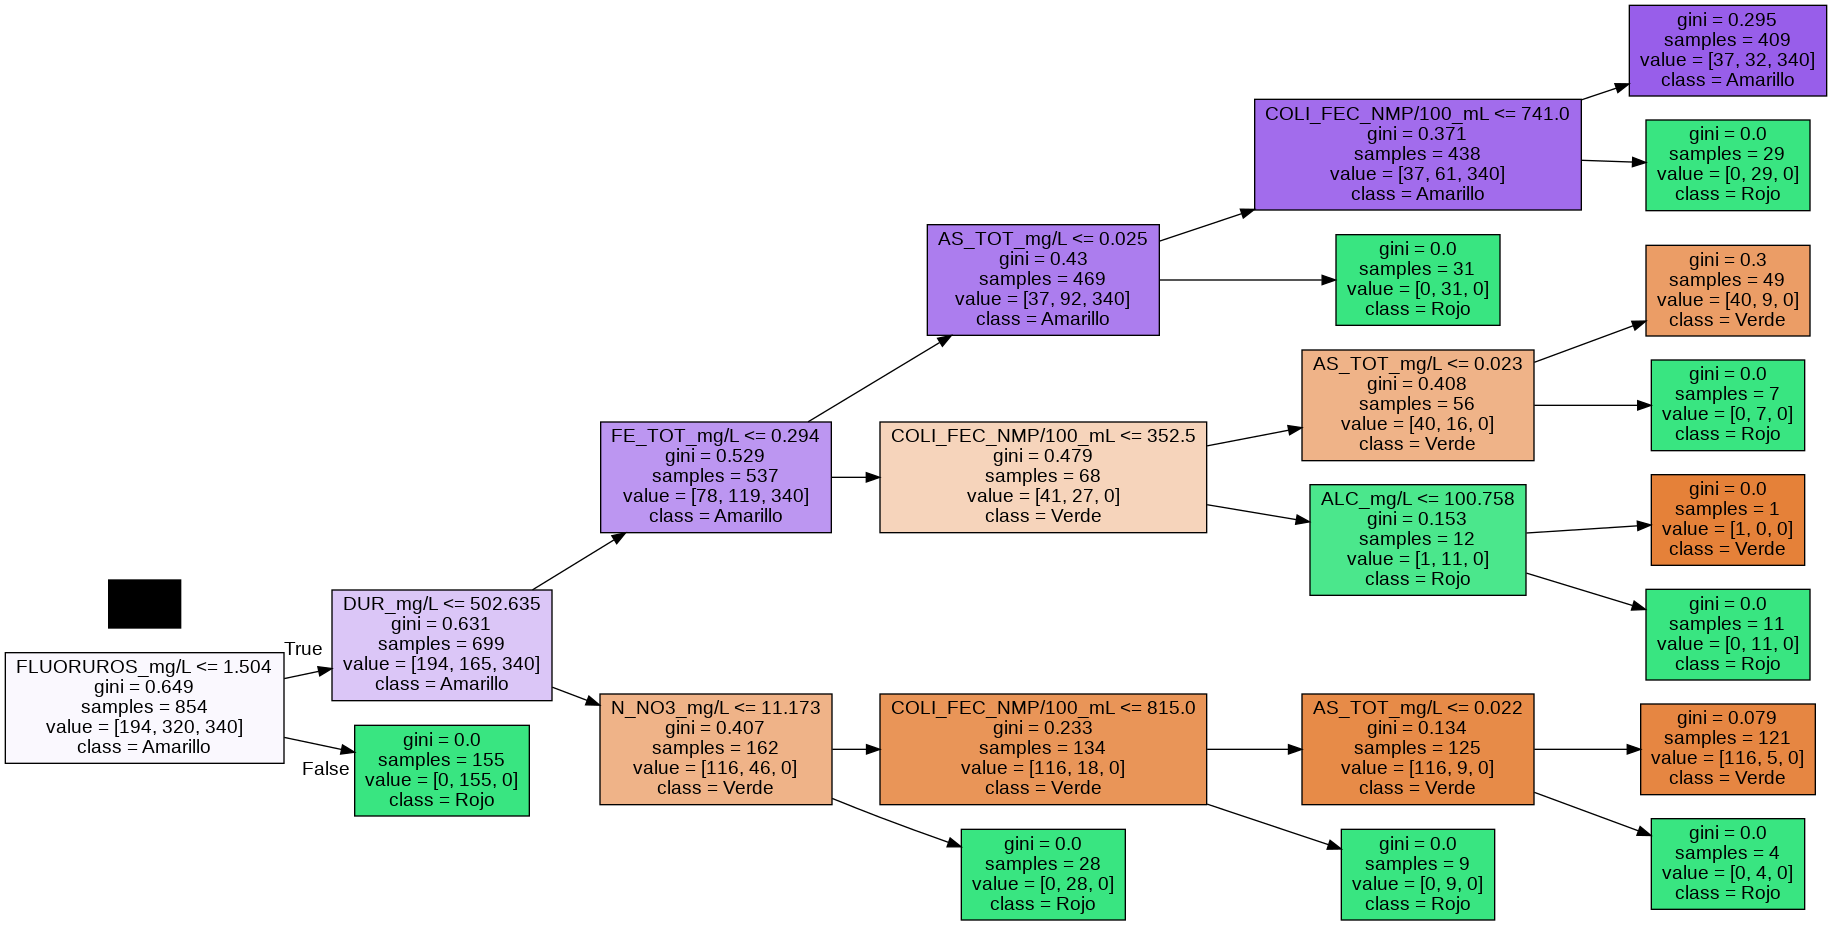

In [58]:

dot_data = tree.export_graphviz(decision_tree = train, 
                                out_file=None,
                                max_depth=5,
                                feature_names=list(pd.DataFrame(X_train).columns.values),
                                class_names = ['Verde', 'Rojo', 'Amarillo'],
                                filled=True,
                                rotate=True,
                                proportion=False)

# Preguntar la profundidad del Random Forest
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [61]:
prob = modeloDT.predict_proba(X_test)
prob[:5,:]

array([[0.09046455, 0.07823961, 0.83129584],
       [0.81632653, 0.18367347, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.09046455, 0.07823961, 0.83129584],
       [0.09046455, 0.07823961, 0.83129584]])

#### **Random Forest**

In [62]:
# Generar el modelo Random Forest

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state = 42)

mimodelo = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
clf = mimodelo.fit(Xtrain, ytrain)

yhat = clf.predict(Xtest)
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(Xtrain, ytrain))
#print('Exactitud en el conjunto de validación: %.2f' % f.score(ytest, yhat))


Exactitud en el conjunto de entrenamiento: 1.00


In [63]:
# Calcular el Accuracy del modelo

clf.score(Xtest, ytest)

0.9626168224299065

Se determinan los features importances

In [64]:
# Features Importance

clf.feature_importances_



array([0.04504508, 0.0643866 , 0.07891793, 0.20197401, 0.11880619,
       0.08451954, 0.10018883, 0.0956307 , 0.        , 0.01877111,
       0.00540825, 0.01126614, 0.08491139, 0.09017423])

In [65]:
X_train.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [66]:
for score, name in zip(clf.feature_importances_, X_train.columns):
    print(round(score, 2), name)

0.05 ALC_mg/L
0.06 CONDUCT_mS/cm
0.08 SDT_M_mg/L
0.2 FLUORUROS_mg/L
0.12 DUR_mg/L
0.08 COLI_FEC_NMP/100_mL
0.1 N_NO3_mg/L
0.1 AS_TOT_mg/L
0.0 CD_TOT_mg/L
0.02 CR_TOT_mg/L
0.01 HG_TOT_mg/L
0.01 PB_TOT_mg/L
0.08 MN_TOT_mg/L
0.09 FE_TOT_mg/L


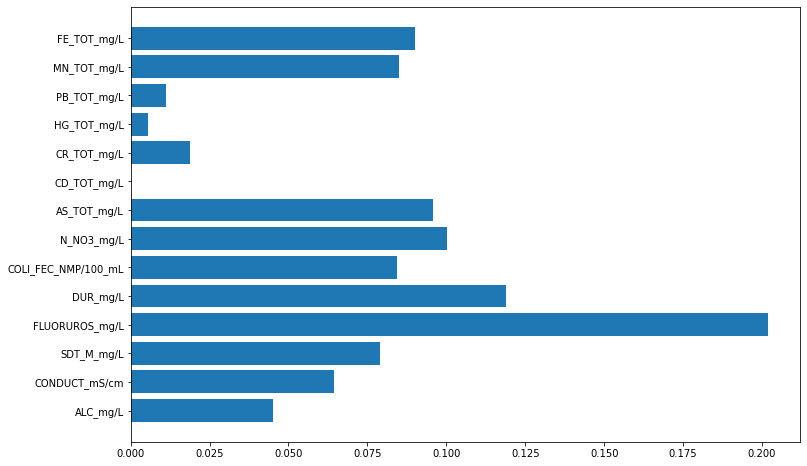

In [67]:
# Gráficar los Features Importances

plt.figure(figsize = (12, 8))
plt.barh(['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'], width = clf.feature_importances_);


In [68]:
#probabilidades

prob2 = mimodelo.predict_proba(Xtest)
prob2[:5,:]

array([[0.01, 0.04, 0.95],
       [0.01, 0.91, 0.08],
       [0.23, 0.75, 0.02],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ]])

In [69]:
confusion_matrix(ytest, yhat)

array([[49,  0,  0],
       [ 3, 65,  0],
       [ 3,  2, 92]])

## Reporte clasificación 

In [70]:
# Obtener el resultado de los reportes de clasificación de cada medida

class_names = ['Verde', 'Rojo', 'Amarillo' ]
print('Reporte de Clasificación Decision Tree')
print(classification_report(y_test, predi, target_names=class_names))

Reporte de Clasificación Decision Tree
              precision    recall  f1-score   support

       Verde       0.90      0.70      0.79        53
        Rojo       0.97      0.84      0.90        67
    Amarillo       0.80      0.98      0.88        94

    accuracy                           0.86       214
   macro avg       0.89      0.84      0.85       214
weighted avg       0.88      0.86      0.86       214



In [71]:
print('Reporte de Clasificación Random Forest')
print(classification_report(ytest, yhat, target_names=class_names))

Reporte de Clasificación Random Forest
              precision    recall  f1-score   support

       Verde       0.89      1.00      0.94        49
        Rojo       0.97      0.96      0.96        68
    Amarillo       1.00      0.95      0.97        97

    accuracy                           0.96       214
   macro avg       0.95      0.97      0.96       214
weighted avg       0.97      0.96      0.96       214



## **Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.**

### **Matriz de Confusión / Decision Tree**

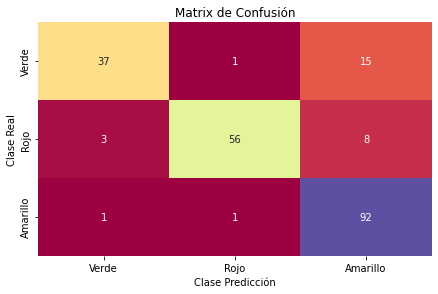

In [72]:
matrix = confusion_matrix(y_test, predi)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Spectral")
plt.title("Matrix de Confusión"), plt.tight_layout()
plt.ylabel("Clase Real"), plt.xlabel("Clase Predicción")
plt.show()

### **Matriz de Confusión / Random Forest**

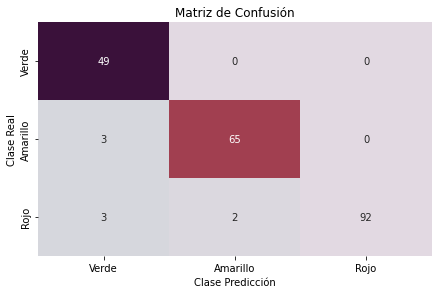

In [73]:
class_names = ['Verde', 'Amarillo', 'Rojo']

matrix = confusion_matrix(ytest, yhat)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="twilight")
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Clase Real"), plt.xlabel("Clase Predicción")
plt.show()